### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [102]:
import pandas as pd
import numpy as np

In [103]:
# df_train_ = pd.read_csv("../data/bigdata.csv")

# df_train = df_train_[df_train_["is_train"] == 1]
# df_test = df_train_[df_train_["is_train"] == 0]
    
# df_test.drop(["is_listened"], axis=1, inplace=True)

# print(len(df_train))
# print(len(df_test))

In [104]:
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

In [105]:
len(df_train)
test_user_ids = df_test["user_id"].unique()
df_train["ts_listen"] = pd.to_datetime(df_train["ts_listen"] )
df_test["ts_listen"] = pd.to_datetime(df_test["ts_listen"] )


In [106]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

def delayed_data(data, delayed_columns, delays=1, start_delay=1):
    """ Retorna um Dataframe com o delay indicado aplicado na lista de colunas indicadas
    
    Params:
        data: um dataframe com os dados originais
        delayed_columns: uma lista de strings com o nome das colunas que quero aplicar o delay
        delays: um int com a quantidade de delays desejados
    Returns:
        df: um dataframe com as colunas indicadas delayadas e já com os dados deslocados retirados
    """
    new_columns_names = []
    df = pd.DataFrame()
    df = data.copy()

    ### Aplico a série de delay em todas as colunas
    for column in delayed_columns:
        for i in range(start_delay, delays + 1):   
            ### Crio uma nova coluna com o delay
            new_columns_names.append(column + "_delayed_" + str(i))
            df[column + "_delayed_" + str(i)] = df[column].shift(i)
            
    ### Excluo os dados que ficam com NaN por causa
    ### do deslocamento.
    df = df.iloc[delays:]
    return df, new_columns_names

def random_sampler(df, user_ids, multiple=1):
    """
    df: a DataFrame to sample from;
    user_ids: a list / array with user ids you want to see in your sample
    multiple: the quantity of examples each id should present in the sample,
              if there is not enough examples in the df for a certain id,
              it returns all of them.
    ---
    sample_index: an array with df indices for the sample
    """
    sample_index = []
    for user_id in user_ids:
        #l = df[df["user_id"] == user_id].index.values
        l = df[df["user_id"] == user_id].iloc[-1].index
        if multiple <= len(l):
            x = np.random.choice(l, multiple, replace=False) 
            sample_index.append(x)
        else:
            sample_index.append(l)
    return np.concatenate(sample_index, axis=0)


def time_series_split(data, proportion=0.8, val=True, verbose=1):
    """
    """
    ### Estou assumindo que o target sempre será a partir da primeira coluna
    features = data.columns.values[1:]
    target = data.columns.values[0]
    train_size = int(len(data) * proportion)
    X_train = data.iloc[0:train_size][features]
    y_train = data.iloc[0:train_size][target]
    
    #test_prop = 1.0 - proportion / 2.0
    X_test = data.iloc[train_size:][features]
    y_test = data.iloc[train_size:][target]
    
    if val:
        index = int(len(X_test)/2)
        X_val = X_test[:index]
        y_val = y_test[:index]

        X_test = X_test[index:]
        y_test = y_test[index:]

        if verbose:
            print("Tamanho do treino: {0}, teste {1} e validação {2}.".format(len(X_train), len(X_test), len(X_val)))
        return X_train, y_train, X_val, y_val, X_test, y_test
    else:
        if verbose:
            print("Tamanho do treino: {0}, teste {1}.".format(len(X_train), len(X_test)))
        return X_train, y_train, X_test, y_test

#ids_for_test = random_sampler(df_train, test_user_ids)

### Analisando quantidade de registro por usuário

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['dark_background'])
#plt.style.use('ggplot')
register_count = df_train["user_id"].value_counts()
register_count.describe()
# plt.show()

count    19918.000000
mean       379.496787
std        508.267045
min          1.000000
25%         66.000000
50%        197.000000
75%        495.000000
max       6317.000000
Name: user_id, dtype: float64

In [108]:
register_count[:5].index.values

array([0, 1, 2, 3, 4])

In [109]:
df_train = df_train[df_train["user_id"].isin(register_count[:].index.values)]

(array([  1.61650000e+04,   2.60900000e+03,   7.13000000e+02,
          2.60000000e+02,   9.50000000e+01,   3.80000000e+01,
          2.10000000e+01,   8.00000000e+00,   6.00000000e+00,
          3.00000000e+00]),
 array([  1.00000000e+00,   6.32600000e+02,   1.26420000e+03,
          1.89580000e+03,   2.52740000e+03,   3.15900000e+03,
          3.79060000e+03,   4.42220000e+03,   5.05380000e+03,
          5.68540000e+03,   6.31700000e+03]),
 <a list of 10 Patch objects>)

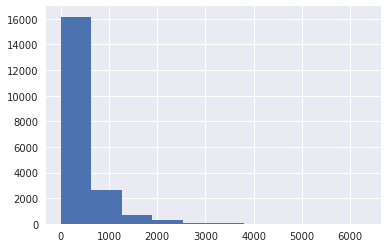

In [110]:
%matplotlib inline
plt.hist(df_train["user_id"].value_counts())

In [111]:
df_train__ = pd.read_csv("../data/train_data4.csv")
register_count = df_train__["user_id"].value_counts()

threshold = 5

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

662
19256


In [112]:
del df_train__

In [113]:
print(len(df_train))
print(len(df_test))

7558817
19918


In [114]:
d = pd.isnull(df_test).sum()
cols_w_na = d[d > 0].index

for column in cols_w_na:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column].fillna(0, inplace=True)

print_full(pd.isnull(df_test).sum())

Unnamed: 0                           0
Unnamed: 0.1                         0
sample_id                            0
genre_id                             0
ts_listen                            0
media_id                             0
album_id                             0
context_type                         0
release_date                         0
platform_name                        0
platform_family                      0
media_duration                       0
listen_type                          0
user_gender                          0
user_id                              0
artist_id                            0
user_age                             0
text                                 0
year                                 0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
release_date_DAY                     0
release_date_MONTH                   0
release_date_YEAR                    0
ts_listen_DAY_OF_WEEK    

In [115]:
users = df_train["user_id"].unique()[:]
from tqdm import tqdm
all_dfs = []

df_train["is_train"] = 1
df_train["sample_id"] = 1
df_test["is_train"] = 0
df_test["is_listened"] = 0

df_train_ = pd.concat([df_train, df_test])

#print(pd.isnull(df_train_).sum())

#print(pd.isnull(df_train_[df_train_["is_train"] == 0]).sum())

df_train_["is_listened"] = df_train_["is_listened"].apply(lambda x : float(x))
df_train_["listen_type"] = df_train_["listen_type"].apply(lambda x : float(x))
#print(len(df_train_))

for user in tqdm(user_for_specific_model[:]):
    df = df_train_[df_train_["user_id"] == user] #.copy(deep=True)
    #print(len(df))
    #df = df.sort("ts_listen")
    df = df.sort_values(by = "ts_listen")
    
    df["flow_listened"] = df["is_listened"] * df["listen_type"]
    df["flows_listened_last_10"] = df["flow_listened"].rolling(4).apply(lambda x : np.sum(x))
    df["flows_listened_mean_last_10"] = df["flow_listened"].rolling(4).apply(lambda x : np.mean(x))
    
    #print(df["flow_listened"].head())
    
    #print(df["flows_listened_mean_last_10"].head(15))
    
    #print(df["flow_listened"].head())
    #df.drop(["flow_listened"], axis=1, inplace=True)
    #print(pd.isnull(df).sum())
    
    #print(pd.isnull(df_train_[df_train_["is_train"] == 0]).sum())
    
    df["diff_last_ts_listen"] = df["ts_listen"].diff()
    df.dropna(inplace=True)
    
    
    df["diff_last_ts_listen"] = df["diff_last_ts_listen"].apply(lambda x : x.seconds / 3600.0)
    
    df, cols = delayed_data(df, ["diff_last_ts_listen", 
                                 "is_listened", 
                                 "listen_type", 
                                 "media_bpm",
                                 "flow_listened",
                                 "flows_listened_last_10", 
                                 "flows_listened_mean_last_10"], 4)
    
    
    #print("null")
    #print(pd.isnull(df).sum().sum())
    df.drop(["flow_listened",
            "flows_listened_last_10",
            "flows_listened_mean_last_10"], axis=1, inplace=True)
    
    #print("len final: {}".format(len(df)))
    


    #print("len final: {}".format(len(df)))
    
    all_dfs.append(df)
    
df_train_ = pd.concat(all_dfs)
print(len(df_train_))
df_train_.head()

100%|██████████| 19256/19256 [1:00:54<00:00,  3.50it/s]


7441661


,Unnamed: 0,Unnamed: 0.1,album_id,artist_albuns,artist_fans,artist_id,artist_radio,context_type,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,...,flow_listened_delayed_3,flow_listened_delayed_4,flows_listened_last_10_delayed_1,flows_listened_last_10_delayed_2,flows_listened_last_10_delayed_3,flows_listened_last_10_delayed_4,flows_listened_mean_last_10_delayed_1,flows_listened_mean_last_10_delayed_2,flows_listened_mean_last_10_delayed_3,flows_listened_mean_last_10_delayed_4
1209271,1209271,1209271,13677550,12.0,95652.0,274673,1.0,0,95.0,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6888421,6888421,6888438,12865076,5.0,99868.0,1009000,1.0,0,200.0,6.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714875,6714875,6714892,12811488,7.0,237704.0,5542423,1.0,0,207.0,6.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2385840,2385840,2385846,13369079,9.0,95310.0,112259,1.0,0,137.0,4.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3706429,3706429,3706435,13257415,11.0,241904.0,5306539,1.0,0,151.0,5.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
#df_train_.to_csv("../data/bigdata.csv")

In [117]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,...,diff_user_song_age,media_decade,media_bpm,media_rank,artist_albuns,artist_fans,artist_radio,user_id_id,is_train,is_listened
0,0,0,0,50,2016-11-02 14:32:51,683078,82356,1,2002-10-08 00:00:00,0,...,15.920548,7,181.0,293191.0,25.0,31649.0,1.0,17698,0,0
1,1,1,1,2744,2016-11-16 15:25:40,876497,99692,1,1985-12-31 00:00:00,0,...,-2.898630,5,88.0,743839.0,10.0,585650.0,1.0,10525,0,0
2,2,2,2,2744,2016-11-19 07:06:01,876497,99692,1,1985-12-31 00:00:00,0,...,-3.906849,5,88.0,743839.0,10.0,585650.0,1.0,8716,0,0
3,3,3,3,2744,2016-11-06 16:42:09,876500,99692,1,1985-12-31 00:00:00,2,...,-0.871233,5,107.0,630042.0,10.0,585650.0,1.0,5443,0,0
4,4,4,4,2744,2016-11-29 17:42:40,876504,99692,1,1985-12-31 00:00:00,2,...,-1.934247,5,110.0,372256.0,10.0,585650.0,1.0,7600,0,0


In [118]:
df_train_["is_train"].head()

1209271    1
6888421    1
6714875    1
2385840    1
3706429    1
Name: is_train, dtype: int64

In [119]:
df_train = df_train_[df_train_["is_train"] == 1]
df_test = df_train_[df_train_["is_train"] == 0]
    
df_test.drop(["is_listened"], axis=1, inplace=True)

print(len(df_train))
print(len(df_test))

7422501
19160


/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
print_full(df_train.dtypes[:])

Unnamed: 0                                        int64
Unnamed: 0.1                                      int64
album_id                                          int64
artist_albuns                                   float64
artist_fans                                     float64
artist_id                                         int64
artist_radio                                    float64
context_type                                      int64
diff_ts_listen_AND_release_date_D               float64
diff_ts_listen_AND_release_date_M               float64
diff_ts_listen_AND_release_date_Y               float64
diff_user_song_age                              float64
genre_id                                          int64
is_listened                                     float64
is_train                                          int64
listen_type                                     float64
media_bpm                                       float64
media_decade                                    

In [121]:
df_train.head()

,Unnamed: 0,Unnamed: 0.1,album_id,artist_albuns,artist_fans,artist_id,artist_radio,context_type,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,...,flow_listened_delayed_3,flow_listened_delayed_4,flows_listened_last_10_delayed_1,flows_listened_last_10_delayed_2,flows_listened_last_10_delayed_3,flows_listened_last_10_delayed_4,flows_listened_mean_last_10_delayed_1,flows_listened_mean_last_10_delayed_2,flows_listened_mean_last_10_delayed_3,flows_listened_mean_last_10_delayed_4
1209271,1209271,1209271,13677550,12.0,95652.0,274673,1.0,0,95.0,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6888421,6888421,6888438,12865076,5.0,99868.0,1009000,1.0,0,200.0,6.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714875,6714875,6714892,12811488,7.0,237704.0,5542423,1.0,0,207.0,6.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2385840,2385840,2385846,13369079,9.0,95310.0,112259,1.0,0,137.0,4.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3706429,3706429,3706435,13257415,11.0,241904.0,5306539,1.0,0,151.0,5.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df_test.head()
# ### select users for specific
# df_train = df_train[df_train["user_id"].isin(user_for_specific_model)]
# df_test = df_test[df_test["user_id"].isin(user_for_specific_model)]
# df_train.columns

,Unnamed: 0,Unnamed: 0.1,album_id,artist_albuns,artist_fans,artist_id,artist_radio,context_type,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,...,flow_listened_delayed_3,flow_listened_delayed_4,flows_listened_last_10_delayed_1,flows_listened_last_10_delayed_2,flows_listened_last_10_delayed_3,flows_listened_last_10_delayed_4,flows_listened_mean_last_10_delayed_1,flows_listened_mean_last_10_delayed_2,flows_listened_mean_last_10_delayed_3,flows_listened_mean_last_10_delayed_4
14561,14561,14561,12219078,5.000000,2.972420e+05,468920,1.0,1,416.0,13.866667,...,1.0,1.0,4.0,3.0,3.0,3.0,1.00,0.75,0.75,0.75
6026,6026,6026,10804138,14.000000,1.043900e+05,4052518,1.0,1,504.0,16.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
9627,9627,9627,11516526,9.000000,3.506000e+03,5328949,1.0,1,363.0,12.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
6064,6064,6064,425785,28.015696,1.272644e+06,57456,1.0,1,2586.0,86.200000,...,1.0,1.0,4.0,4.0,4.0,4.0,1.00,1.00,1.00,1.00
8065,8065,8065,6985314,16.000000,3.539680e+05,1435566,1.0,1,1158.0,38.600000,...,1.0,0.0,1.0,1.0,1.0,1.0,0.25,0.25,0.25,0.25


In [123]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']#, 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,album_id,artist_albuns,artist_fans,artist_id,artist_radio,context_type,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,diff_user_song_age,...,flow_listened_delayed_3,flow_listened_delayed_4,flows_listened_last_10_delayed_1,flows_listened_last_10_delayed_2,flows_listened_last_10_delayed_3,flows_listened_last_10_delayed_4,flows_listened_mean_last_10_delayed_1,flows_listened_mean_last_10_delayed_2,flows_listened_mean_last_10_delayed_3,flows_listened_mean_last_10_delayed_4
1209271,13677550,12.0,95652.0,274673,1.0,0,95.0,3.166667,0.260274,25.739726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6888421,12865076,5.0,99868.0,1009000,1.0,0,200.0,6.666667,0.547945,25.452055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714875,12811488,7.0,237704.0,5542423,1.0,0,207.0,6.900000,0.567123,25.432877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2385840,13369079,9.0,95310.0,112259,1.0,0,137.0,4.566667,0.375342,25.624658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3706429,13257415,11.0,241904.0,5306539,1.0,0,151.0,5.033333,0.413699,25.586301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
#pd.set_option("precision", 2)
df_train.head()

,album_id,artist_albuns,artist_fans,artist_id,artist_radio,context_type,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,diff_user_song_age,...,flow_listened_delayed_3,flow_listened_delayed_4,flows_listened_last_10_delayed_1,flows_listened_last_10_delayed_2,flows_listened_last_10_delayed_3,flows_listened_last_10_delayed_4,flows_listened_mean_last_10_delayed_1,flows_listened_mean_last_10_delayed_2,flows_listened_mean_last_10_delayed_3,flows_listened_mean_last_10_delayed_4
1209271,13677550,12.0,95652.0,274673,1.0,0,95.0,3.166667,0.260274,25.739726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6888421,12865076,5.0,99868.0,1009000,1.0,0,200.0,6.666667,0.547945,25.452055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6714875,12811488,7.0,237704.0,5542423,1.0,0,207.0,6.900000,0.567123,25.432877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2385840,13369079,9.0,95310.0,112259,1.0,0,137.0,4.566667,0.375342,25.624658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3706429,13257415,11.0,241904.0,5306539,1.0,0,151.0,5.033333,0.413699,25.586301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

In [126]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

In [127]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

### Append User Specific

In [128]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]


#df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.fillna(0, inplace=True)

df_user["nmidia_PROP_diff"] = df_user['nmidia_with_flow_listened_PROP'] - df_user['nmidia_regular_listened_PROP']

df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

In [129]:
# x = pd.isnull(df_user).sum()
# x[x > 0]

import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)

import gc
gc.collect()

#del df_train_

4750.400672
12.415712


98

In [130]:
# df_test.to_csv("../data/test_ts.csv")
# df_train.to_csv("../data/train_ts.csv")
# #!rm ../data/test_ts.csv

In [131]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,album_id,artist_albuns,artist_fans,artist_id,artist_radio,context_type,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,diff_user_song_age,...,flows_listened_mean_last_10_delayed_2,flows_listened_mean_last_10_delayed_3,flows_listened_mean_last_10_delayed_4,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,13677550,12.0,95652.0,274673,1.0,0,95.0,3.166667,0.260274,25.739726,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
1,12865076,5.0,99868.0,1009000,1.0,0,200.0,6.666667,0.547945,25.452055,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
2,12811488,7.0,237704.0,5542423,1.0,0,207.0,6.900000,0.567123,25.432877,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
3,13369079,9.0,95310.0,112259,1.0,0,137.0,4.566667,0.375342,25.624658,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
4,13257415,11.0,241904.0,5306539,1.0,0,151.0,5.033333,0.413699,25.586301,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917


### Check for NA
#### Ver depois sobre o user_age_group!

In [132]:
# x = pd.isnull(df_train).sum()
# x[x > 0]

In [133]:
# df_train.dropna(inplace=True)

In [134]:
# x = pd.isnull(df_train).sum()
# x[x > 0]
# del x

In [135]:
y = df_train["is_listened"].values

In [136]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

In [137]:
print(len(df_train.columns))
print(len(set(df_train.columns)))

72
72


### Let's inspect the categorical variables!

In [138]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2905
media_id: 448845
album_id: 150115
context_type: 74
release_date: 8872
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 19054
artist_id: 66524
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [139]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [140]:
df_train.columns.values

array(['album_id', 'artist_albuns', 'artist_fans', 'artist_id',
       'artist_radio', 'context_type', 'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'diff_user_song_age',
       'genre_id', 'is_listened', 'is_train', 'listen_type', 'media_bpm',
       'media_decade', 'media_duration', 'media_id', 'media_rank',
       'platform_family', 'platform_name', 'release_date',
       'release_date_DAY', 'release_date_MONTH', 'release_date_YEAR',
       'sample_id', 'text', 'ts_listen', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age', 'user_age_group',
       'user_gender', 'user_id', 'user_id_id', 'year',
       'diff_last_ts_listen', 'diff_last_ts_listen_delayed_1',
       'diff_last_ts_listen_delayed_2', 'diff_last_ts_listen_delayed_3',
       'diff_last_ts_listen_delayed_4', 'is_listened_delayed_1',
       'is_listened_delayed_2', 'is_listened_delayed_3',
       'is_listened_delayed_4', 'list

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

('media_rank', 108554)
('media_bpm', 105514)
('diff_user_song_age', 100350)
('artist_fans', 99141)
('artist_albuns', 95015)
('album_id', 80906)
('diff_ts_listen_AND_release_date_Y', 77166)
('media_id', 73054)
('nmidia_regular_listened_PROP', 71187)
('nmidia_regular_listened', 69962)
('nmidia_PROP_diff', 64373)
('nmidia_with_flow_listened', 62142)
('nmidia_regular', 59499)
('nmidia_with_flow', 57739)
('user_id', 56269)
('nmidia_with_flow_listened_PROP', 55801)
('genre_id', 36985)
('context_type', 29875)
('ts_listen_PERIOD_OF_DAY_1', 26963)
('media_duration', 23570)
('release_date_YEAR', 18939)
('user_gender_1', 15002)
('ts_listen_PERIOD_OF_DAY_2', 10208)
('ts_listen_DAY_OF_WEEK_1', 9843)
('ts_listen_DAY_OF_WEEK_3', 9767)
('ts_listen_DAY_OF_WEEK_4', 9611)
('ts_listen_DAY_OF_WEEK_5', 9029)

In [141]:
cols_for_target_encoder = ["user_id"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "user_age",
                   "listen_type",
                   "artist_radio",
                   "user_age_group",
                   "media_decade",
                   "user_gender", 
                   "ts_listen_DAY_OF_WEEK",
                   "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                 "genre_id",
                "artist_fans",
                "media_id", 
                 "album_id",
                "context_type"]


target = "is_listened"



###########################

cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "album_id",
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "user_age",
                   "artist_radio",
                   "user_age_group",
                   "media_decade",
                   "user_gender", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                "artist_fans"]


target = "is_listened"

In [142]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [143]:
te.fit(df_train)

In [144]:
te.transform(df_train)
te.transform(df_test)
del te

In [145]:
print("das")

das


In [146]:
print("teste")

teste


In [147]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

In [148]:
# rc = RankCategorical(["media_decade"])
# rc.fit(df_train)
# rc.transform(df_train)
# rc.transform(df_test)
# del rc

In [149]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [150]:
df_train.head()

,album_id,artist_albuns,artist_fans,artist_id,artist_radio,context_type,diff_ts_listen_AND_release_date_D,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,diff_user_song_age,...,flows_listened_mean_last_10_delayed_2,flows_listened_mean_last_10_delayed_3,flows_listened_mean_last_10_delayed_4,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,0.654807,12.0,173,173,1.0,0.688276,95.0,3.166667,0.260274,25.739726,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
1,0.695519,5.0,138,138,1.0,0.688276,200.0,6.666667,0.547945,25.452055,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
2,0.722461,7.0,50,50,1.0,0.688276,207.0,6.900000,0.567123,25.432877,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
3,0.694836,9.0,113,113,1.0,0.688276,137.0,4.566667,0.375342,25.624658,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917
4,0.690633,11.0,97,97,1.0,0.688276,151.0,5.033333,0.413699,25.586301,...,0.0,0.0,0.0,1695,833,1710,848,0.982311,0.991228,-0.008917


In [151]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [152]:
print(df_train.head())

   album_id  artist_albuns  artist_fans  artist_id  context_type  diff_ts_listen_AND_release_date_D  diff_ts_listen_AND_release_date_M  diff_ts_listen_AND_release_date_Y  diff_user_song_age  \
0  0.654807           12.0          173        173      0.688276                               95.0                           3.166667                           0.260274           25.739726   
1  0.695519            5.0          138        138      0.688276                              200.0                           6.666667                           0.547945           25.452055   
2  0.722461            7.0           50         50      0.688276                              207.0                           6.900000                           0.567123           25.432877   
3  0.694836            9.0          113        113      0.688276                              137.0                           4.566667                           0.375342           25.624658   
4  0.690633           11.0         

In [153]:
#df_train = rank_categorical(df_train, cols_for_rank)
from collections import Counter
Counter(list(df_train.columns))

Counter({'album_id': 1,
         'artist_albuns': 1,
         'artist_fans': 1,
         'artist_id': 1,
         'context_type': 1,
         'diff_last_ts_listen': 1,
         'diff_last_ts_listen_delayed_1': 1,
         'diff_last_ts_listen_delayed_2': 1,
         'diff_last_ts_listen_delayed_3': 1,
         'diff_last_ts_listen_delayed_4': 1,
         'diff_ts_listen_AND_release_date_D': 1,
         'diff_ts_listen_AND_release_date_M': 1,
         'diff_ts_listen_AND_release_date_Y': 1,
         'diff_user_song_age': 1,
         'flow_listened_delayed_1': 1,
         'flow_listened_delayed_2': 1,
         'flow_listened_delayed_3': 1,
         'flow_listened_delayed_4': 1,
         'flows_listened_last_10_delayed_1': 1,
         'flows_listened_last_10_delayed_2': 1,
         'flows_listened_last_10_delayed_3': 1,
         'flows_listened_last_10_delayed_4': 1,
         'flows_listened_mean_last_10_delayed_1': 1,
         'flows_listened_mean_last_10_delayed_2': 1,
         'flows_l

In [154]:
print(len(df_train.columns))
print(len(set(df_train.columns)))

99
99


In [155]:
df_train.columns.values

array(['album_id', 'artist_albuns', 'artist_fans', 'artist_id',
       'context_type', 'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'diff_user_song_age',
       'genre_id', 'is_listened', 'is_train', 'listen_type', 'media_bpm',
       'media_duration', 'media_id', 'media_rank', 'release_date',
       'release_date_DAY', 'release_date_MONTH', 'release_date_YEAR',
       'sample_id', 'text', 'ts_listen', 'user_id', 'user_id_id', 'year',
       'diff_last_ts_listen', 'diff_last_ts_listen_delayed_1',
       'diff_last_ts_listen_delayed_2', 'diff_last_ts_listen_delayed_3',
       'diff_last_ts_listen_delayed_4', 'is_listened_delayed_1',
       'is_listened_delayed_2', 'is_listened_delayed_3',
       'is_listened_delayed_4', 'listen_type_delayed_1',
       'listen_type_delayed_2', 'listen_type_delayed_3',
       'listen_type_delayed_4', 'media_bpm_delayed_1',
       'media_bpm_delayed_2', 'media_bpm_delayed_3', '

In [156]:
print(len(df_train.columns))
print(len(set(df_train.columns)))

99
99


In [157]:
%timeit
### Drop
to_drop = ['ts_listen', 'release_date', "year", "text", 'release_date_DAY', 'release_date_MONTH']#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [158]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [159]:
ignore_list = [target, "user_id_id"]
features = [col for col in df_train.columns.values if col not in ignore_list]
features

['album_id',
 'artist_albuns',
 'artist_fans',
 'artist_id',
 'context_type',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'diff_user_song_age',
 'genre_id',
 'is_train',
 'listen_type',
 'media_bpm',
 'media_duration',
 'media_id',
 'media_rank',
 'release_date_YEAR',
 'sample_id',
 'user_id',
 'diff_last_ts_listen',
 'diff_last_ts_listen_delayed_1',
 'diff_last_ts_listen_delayed_2',
 'diff_last_ts_listen_delayed_3',
 'diff_last_ts_listen_delayed_4',
 'is_listened_delayed_1',
 'is_listened_delayed_2',
 'is_listened_delayed_3',
 'is_listened_delayed_4',
 'listen_type_delayed_1',
 'listen_type_delayed_2',
 'listen_type_delayed_3',
 'listen_type_delayed_4',
 'media_bpm_delayed_1',
 'media_bpm_delayed_2',
 'media_bpm_delayed_3',
 'media_bpm_delayed_4',
 'flow_listened_delayed_1',
 'flow_listened_delayed_2',
 'flow_listened_delayed_3',
 'flow_listened_delayed_4',
 'flows_listened_last_10_delayed_1',
 'flows_listened_last

In [160]:
pd.isnull(df_train).sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [161]:
import numpy as np
np.sum(np.isinf(df_train))

album_id                             0
artist_albuns                        0
artist_fans                          0
artist_id                            0
context_type                         0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
diff_user_song_age                   0
genre_id                             0
is_listened                          0
is_train                             0
listen_type                          0
media_bpm                            0
media_duration                       0
media_id                             0
media_rank                           0
release_date_YEAR                    0
sample_id                            0
user_id                              0
user_id_id                           0
diff_last_ts_listen                  0
diff_last_ts_listen_delayed_1        0
diff_last_ts_listen_delayed_2        0
diff_last_ts_listen_delayed_3        0
diff_last_ts_listen_delay

In [162]:
print_full(pd.isnull(df_test).sum()[:])

Unnamed: 0                               0
Unnamed: 0.1                             0
album_id                                 0
artist_albuns                            0
artist_fans                              0
artist_id                                0
context_type                             0
diff_ts_listen_AND_release_date_D        0
diff_ts_listen_AND_release_date_M        0
diff_ts_listen_AND_release_date_Y        0
diff_user_song_age                       0
genre_id                                 0
is_train                                 0
listen_type                              0
media_bpm                                0
media_duration                           0
media_id                                 0
media_rank                               0
release_date_YEAR                        0
sample_id                                0
user_id                                  0
user_id_id                               0
diff_last_ts_listen                      0
diff_last_t

In [163]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [164]:
for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

0

In [165]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [166]:
# df_train.fillna(0, inplace=True)
# df_test.fillna(0, inplace=True)

In [167]:
# pd.isnull(df_train).sum()

In [168]:
from sklearn.model_selection import train_test_split
features = list(set(features))

In [169]:
# features = ['media_duration',
#  'user_id',
#  'artist_id',
#  'diff_ts_listen_AND_release_date_M',
#  'diff_ts_listen_AND_release_date_Y',
#  'release_date_YEAR',
#  'diff_user_song_age',
#  'artist_albuns',
#  'artist_fans',
#  'media_bpm',
#  'media_rank',
#  'nmidia_regular_listened',
#  'nmidia_with_flow_listened',
#  'nmidia_regular',
#  'nmidia_with_flow',
#  'nmidia_with_flow_listened_PROP',
#  'nmidia_regular_listened_PROP',
#  'nmidia_PROP_diff',
#  'listen_type_1',
#  'user_gender_1',
#  'ts_listen_DAY_OF_WEEK_1',
#  'ts_listen_DAY_OF_WEEK_2',
#  'ts_listen_DAY_OF_WEEK_3',
#  'ts_listen_DAY_OF_WEEK_4',
#  'ts_listen_DAY_OF_WEEK_5',
#  'ts_listen_DAY_OF_WEEK_6',
#  'ts_listen_PERIOD_OF_DAY_1',
#  'ts_listen_PERIOD_OF_DAY_2',
#  'ts_listen_PERIOD_OF_DAY_3']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)
import gc
gc.collect()

1444

### Feature Selection

In [171]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

82 selected variables from 91, 90.11%
['diff_user_song_age', 'flows_listened_mean_last_10_delayed_2', 'flows_listened_mean_last_10_delayed_3', 'flows_listened_mean_last_10_delayed_1', 'media_duration', 'flows_listened_mean_last_10_delayed_4', 'platform_family_1', 'nmidia_with_flow', 'platform_family_2', 'flows_listened_last_10_delayed_3', 'flows_listened_last_10_delayed_2', 'flows_listened_last_10_delayed_1', 'flows_listened_last_10_delayed_4', 'album_id', 'diff_last_ts_listen_delayed_1', 'diff_last_ts_listen_delayed_3', 'diff_last_ts_listen_delayed_2', 'diff_last_ts_listen_delayed_4', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3', 'listen_type_delayed_3', 'listen_type_delayed_2', 'listen_type_delayed_1', 'listen_type', 'listen_type_delayed_4', 'artist_albuns', 'context_type', 'artist_fans', 'genre_id', 'platform_name_2', 'platform_name_1', 'diff_ts_listen_AND_release_date_Y', 'user_id', 'nmidia_regular_listened', 'user_age_19', 'diff_ts_listen_A

In [172]:
features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [173]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [174]:
# %timeit
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [175]:
# print(model.score(X_test, y_test))
# complete_report(y_test, model.predict(X_test))
print(len(X_train.columns))
print(len(set(X_train.columns)))

82
82


In [176]:
print(len(features))
print(len(set(features)))

82
82


acc: 0.70345496362865445  
roc: 0.6912675674785278

In [177]:
from sklearn.metrics import confusion_matrix

*********************************
Accuracy: 0.82
Precision: 0.870550928993
Recall: 0.863785868098
F1-Score: 0.867155204439
[[337908 130509]
 [138405 877679]]
Roc Area: 0.792584369244


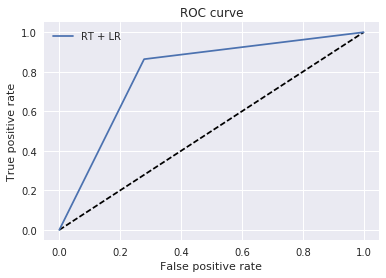

*********************************


0.79258436924432263

In [178]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)
complete_report(y_test, model.predict(X_test))

In [81]:
# df_test_group_1 = df_test[df_test["user_id_id"].isin(user_for_specific_model)].copy(deep=True)

# p = model.predict_proba(df_test_group_1[features])
# p = p[:, 1]
# df_test_group_1["prediction"] = p
# df_test_group_1["prediction"].head()

# len(X_train.columns)

# print(len(df_test))
# print(len(df_test_group_1))
# df_test_group_1[["prediction", "user_id_id"]].to_csv("group1_note21_rand.csv")

19160
19160


In [83]:
# df_train[(df_train["listen_type"] == 1)]["is_listened"].mean()

nan

In [84]:
# df_test_group_2 = df_test[df_test["user_id_id"].isin(user_for_general_model)].copy(deep=True)

# p = 0.63
# df_test_group_2["prediction"] = p

# df_test_group_2["prediction"] = p
# df_test_group_2["prediction"].head()

Series([], Name: prediction, dtype: float64)

In [180]:
def random_sampler(df, user_ids, multiple=1):
    """
    df: a DataFrame to sample from;
    user_ids: a list / array with user ids you want to see in your sample
    multiple: the quantity of examples each id should present in the sample,
              if there is not enough examples in the df for a certain id,
              it returns all of them.
    ---
    sample_index: an array with df indices for the sample
    """
    sample_index = []
    for user_id in tqdm(user_ids):
        l = df[df["user_id"] == user_id].index.values
        if multiple <= len(l):
            x = np.random.choice(l, multiple, replace=False) 
            sample_index.append(x)
        else:
            sample_index.append(l)
    return np.concatenate(sample_index, axis=0)

test_user_ids = df_train["user_id_id"].unique()

ids_for_test = random_sampler(df_train, test_user_ids, multiple=2)


X_train = df_train[~df_train.index.isin(ids_for_test)][features]
X_test = df_train[df_train.index.isin(ids_for_test)][features]
y_test = df_train[df_train.index.isin(ids_for_test)][features]
y_train = df_train[~df_train.index.isin(ids_for_test)][target]

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

100%|██████████| 19054/19054 [01:57<00:00, 163.76it/s]


In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [ ]:
import xgboost as xgb
from time import time
import numpy as np

start = time()
xg_train = xgb.DMatrix(X_train, label=y_train.values, missing=np.NaN)
xg_test = xgb.DMatrix(X_test, label=y_test.values, missing=np.NaN)
xg_val = xgb.DMatrix(X_val, label=y_val.values, missing=np.NaN)
param = {'max_depth':50, 
         'eta':0.2, 
         'silent':0, 
         'objective':'binary:logistic', 
         "booster": "gbtree", 
         "max_delta_step":1,
         "alpha": 0.2,
         "lambda": 0.2,
         #"scale_pos_weight": class_ratio,
         "eval_metric": "auc",
          "verbose": 1}

### Objectives
## 'binary:logistic'
## 'multi:softprob'
#param['num_class'] = 2
param["min_child_weight"] = 30
param["colsample_bytree"] = 0.5
num_round = 100

watchlist = [(xg_train,'train'), (xg_test,'test'), (xg_val,'validation')]
#watchlist = [(xg_val,'validation')]

bst = xgb.train(param, 
                xg_train, 
                num_round,
                watchlist,
                early_stopping_rounds=3)

yprob = bst.predict( xg_test ) #.reshape( y_test.shape[0], 2)
print(yprob[0])

print('Tempo de execução: {0}m{1}s'.format(int((time()-start)/60),
             int((time()-start)%60 )))

In [ ]:
y_pred = [1 if y > 0.5 else 0 for y in yprob]
#print(metrics.confusion_matrix(y_test, y_pred))
yprob = bst.predict( xg_test ) 
#complete_report(y_test, yprob)
len(yprob)

### Verificando a importância de cada feature para a previsão do modelo
import operator
importance = bst.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
for item in importance:
    print(item)

In [ ]:
complete_report(y_test, y_pred)

In [ ]:
df_test_group_1 = df_test[df_test["user_id_id"].isin(user_for_specific_model)].copy(deep=True)
xg_sub = xgb.DMatrix(df_test_group_1[features], missing=np.NaN)
p = bst.predict(xg_sub)

#p = model.predict_proba(df_test_group_1[features])
#p = p[:, 1]
df_test_group_1["prediction"] = p
df_test_group_1["prediction"].head()

In [ ]:
print(len(df_test))
print(len(df_test_group_1))
df_test_group_1[["prediction", "user_id_id"]]
df_test_group_1[["prediction", "user_id_id"]].to_csv("group1.csv")
df_test_group_1[["prediction", "user_id_id"]].to_csv("group1_note21.csv")

In [123]:
df_test_group_1.head()

,Unnamed: 0,prediction
user_id_id,,
0.0,0,0.981403
1.0,1,0.928719
2.0,2,0.854829
3.0,3,0.978622
4.0,4,0.388160


In [ ]:
import gc
gc.collect()
#del df_test_group_1

In [139]:
import pandas as pd
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)

# df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# # pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
# df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
# df_user.columns.values
# df_train = pd.merge(df_train, df_user, on="user_id")
# df_test = pd.merge(df_test, df_user, on="user_id")
# del df_user


### select users for general

#df_train = df_train[df_train["user_id"].isin(user_for_general_model)]

threshold = 5

register_count = df_train["user_id"].value_counts()

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

cols_for_target_encoder = ["genre_id", 
                           "media_id", 
                           "artist_radio"]

cols_for_onehot = ["platform_name", 
                   "user_age",
                   "listen_type",
                   "user_gender", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                "artist_fans"]

target = "is_listened"

df_test = df_test[df_test["user_id"].isin(user_for_general_model)]
df_train.columns

te = TargetEncoder(cols_for_target_encoder, "is_listened")
te.fit(df_train)
te.transform(df_train)
te.transform(df_test)
del te

rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

ban = ["user_id", "user_id_id"]
features = [col for col in df_train.columns.values if col != target and col not in ban]
features

662
19256


['genre_id',
 'media_id',
 'context_type',
 'platform_family',
 'media_duration',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'user_age_group',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'platform_name_1',
 'platform_name_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [140]:
# features =['genre_id', 
#            'media_id', 
#            'context_type', 
#     #       'media_duration', 
#            'listen_type', 
#     #       'user_id', 
#    #        'diff_ts_listen_AND_release_date_D', 
#            'diff_ts_listen_AND_release_date_M', 
#    #        'diff_ts_listen_AND_release_date_Y', 
#     #       'release_date_YEAR', 
#            'diff_user_song_age', 
#            'artist_albuns', 
#            'artist_fans', 
#            'artist_radio', 
#            'media_bpm', 
#            'media_rank', 
#            #'user_id_id', 
# #            'nmidia_regular_listened', 
# #            'nmidia_with_flow_listened', 
# #            'nmidia_regular', 
# #            'nmidia_with_flow', 
#            'platform_name_1', 
#            'platform_name_2', 
#            'platform_family_1', 
#            'platform_family_2', 
#            'user_age_19', 
#            'user_age_20', 
#            'user_age_21', 
#            'user_age_22', 
#            'user_age_23', 
#            'user_age_25', 
#            'user_age_26', 
#            'user_age_27', 
#            'user_age_28', 
#            'user_age_29', 
#            'user_age_30', 
#            'user_age_group_1',
#            'user_age_group_2', 
#            'user_gender_1', 
#            'user_age_group_1', 
#            'user_age_group_2', 
#            'ts_listen_DAY_OF_WEEK_1',
#            'ts_listen_DAY_OF_WEEK_2', 
#            'ts_listen_DAY_OF_WEEK_3', 
#            'ts_listen_DAY_OF_WEEK_4', 
#            'ts_listen_DAY_OF_WEEK_5',
#            'ts_listen_PERIOD_OF_DAY_2', 
#            'ts_listen_PERIOD_OF_DAY_3']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.001

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

39 selected variables from 44, 88.64%
['genre_id', 'media_id', 'context_type', 'platform_family', 'media_duration', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_MONTH', 'release_date_YEAR', 'user_age_group', 'diff_user_song_age', 'media_decade', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'platform_name_1', 'platform_name_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'listen_type_1', 'user_gender_1', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


0.70515834482101702

*********************************
Accuracy: 0.71
Precision: 0.774869638163
Recall: 0.802040577558
F1-Score: 0.788221023529
[[236549 240998]
 [204733 829484]]
Roc Area: 0.648691198658


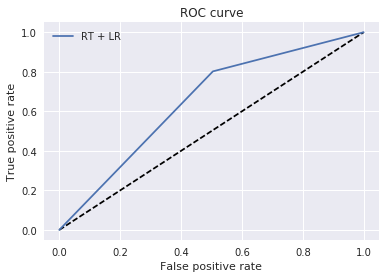

*********************************


0.6486911986578815

In [141]:
complete_report(y_test, model.predict(X_test))

In [142]:
df_test["listen_type_1"] = 1
features

d = pd.isnull(df_test).sum()
cols_w_na = d[d > 0].index

for column in cols_w_na:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column].fillna(0, inplace=True)

print_full(pd.isnull(df_test).sum())

pd.isnull(df_test).sum()

Unnamed: 0                           0
Unnamed: 0.1                         0
sample_id                            0
genre_id                             0
media_id                             0
context_type                         0
platform_family                      0
media_duration                       0
user_id                              0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
release_date_DAY                     0
release_date_MONTH                   0
release_date_YEAR                    0
user_age_group                       0
diff_user_song_age                   0
media_decade                         0
media_bpm                            0
media_rank                           0
artist_albuns                        0
artist_fans                          0
artist_radio                         0
user_id_id                           0
platform_name_1                      0
platform_name_2          

Unnamed: 0                           0
Unnamed: 0.1                         0
sample_id                            0
genre_id                             0
media_id                             0
context_type                         0
platform_family                      0
media_duration                       0
user_id                              0
diff_ts_listen_AND_release_date_D    0
diff_ts_listen_AND_release_date_M    0
diff_ts_listen_AND_release_date_Y    0
release_date_DAY                     0
release_date_MONTH                   0
release_date_YEAR                    0
user_age_group                       0
diff_user_song_age                   0
media_decade                         0
media_bpm                            0
media_rank                           0
artist_albuns                        0
artist_fans                          0
artist_radio                         0
user_id_id                           0
platform_name_1                      0
platform_name_2          

In [143]:
df_test_group_2 = df_test[df_test["user_id_id"].isin(user_for_general_model)].copy(deep=True)

p = model.predict_proba(df_test_group_2[features])
p = p[:, 1]

df_test_group_2["prediction"] = p
df_test_group_2["prediction"].head()

print(len(df_test))
print(len(df_test_group_1))
df_test_group_2[["prediction", "user_id_id"]]
df_test_group_2[["prediction", "user_id_id"]].to_csv("group2.csv")
df_test_group_2[["prediction", "user_id_id"]].to_csv("group2_note21.csv")

662
19160


In [83]:
features

['genre_id',
 'media_id',
 'context_type',
 'platform_family',
 'media_duration',
 'user_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'user_age_group',
 'diff_user_song_age',
 'media_decade',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [84]:
len(df_test)

2630

In [85]:
# features =['genre_id', 
#            'media_id', 
#            'context_type', 
#     #       'media_duration', 
#            'listen_type', 
#     #       'user_id', 
#    #        'diff_ts_listen_AND_release_date_D', 
#            'diff_ts_listen_AND_release_date_M', 
#    #        'diff_ts_listen_AND_release_date_Y', 
#     #       'release_date_YEAR', 
#            'diff_user_song_age', 
#            'artist_albuns', 
#            'artist_fans', 
#            'artist_radio', 
#            'media_bpm', 
#            'media_rank', 
#            #'user_id_id', 
# #            'nmidia_regular_listened', 
# #            'nmidia_with_flow_listened', 
# #            'nmidia_regular', 
# #            'nmidia_with_flow', 
#            'platform_name_1', 
#            'platform_name_2', 
#            'platform_family_1', 
#            'platform_family_2', 
#            'user_age_19', 
#            'user_age_20', 
#            'user_age_21', 
#            'user_age_22', 
#            'user_age_23', 
#            'user_age_25', 
#            'user_age_26', 
#            'user_age_27', 
#            'user_age_28', 
#            'user_age_29', 
#            'user_age_30', 
#            'user_age_group_1',
#            'user_age_group_2', 
# #            'media_decade_1', 
#            'media_decade_2',
#            'media_decade_5', 
#            'media_decade_7', 
#            'media_decade_8', 
#            'user_gender_1', 
#            'user_age_group_1', 
#            'user_age_group_2', 
#            'ts_listen_DAY_OF_WEEK_1',
#            'ts_listen_DAY_OF_WEEK_2', 
#            'ts_listen_DAY_OF_WEEK_3', 
#            'ts_listen_DAY_OF_WEEK_4', 
#            'ts_listen_DAY_OF_WEEK_5',
#            'ts_listen_PERIOD_OF_DAY_2', 
#            'ts_listen_PERIOD_OF_DAY_3']

['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'artist_radio', 'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'user_age_group_1', 'user_age_group_2', 'media_decade_1', 'media_decade_2', 'media_decade_5', 'media_decade_7', 'media_decade_8', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']

In [86]:
### 0.7678

for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

0

In [87]:
# df_test = df_test.fillna(df_train.mean(skipna=True).to_dict, axis=1)#.dropna(axis=1, how='all')
# pd.isnull(df_test).sum()
# df_train.mean(skipna=True).to_dict
features = ['media_duration',
            "genre_id",
            "artist_radio",
 #'artist_id',
 'diff_ts_listen_AND_release_date_M',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'media_bpm',
 'media_rank',
 'listen_type_1',
 'user_gender_1',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.001

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

17 selected variables from 20, 85.00%
['media_duration', 'genre_id', 'diff_ts_listen_AND_release_date_M', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'listen_type_1', 'user_gender_1', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [89]:
import xgboost as xgb
from time import time
import numpy as np

start = time()
xg_train = xgb.DMatrix(X_train, label=y_train.values, missing=np.NaN)
xg_test = xgb.DMatrix(X_test, label=y_test.values, missing=np.NaN)
xg_val = xgb.DMatrix(X_val, label=y_val.values, missing=np.NaN)
param = {'max_depth':55, 
         'eta':0.2, 
         'silent':0, 
         'objective':'binary:logistic', 
         "booster": "gbtree", 
         "max_delta_step":1,
         "alpha": 0.2,
         "lambda": 0.2,
         #"scale_pos_weight": class_ratio,
         "eval_metric": "auc",
          "verbose": 1}

### Objectives
## 'binary:logistic'
## 'multi:softprob'
#param['num_class'] = 2
param["min_child_weight"] = 30
param["colsample_bytree"] = 0.5
num_round = 50

watchlist = [(xg_train,'train'), (xg_test,'test'), (xg_val,'validation')]
#watchlist = [(xg_val,'validation')]

bst = xgb.train(param, 
                xg_train, 
                num_round,
                watchlist,
                early_stopping_rounds=5)

yprob = bst.predict( xg_test ) #.reshape( y_test.shape[0], 2)
print(yprob[0])

print('Tempo de execução: {0}m{1}s'.format(int((time()-start)/60),
             int((time()-start)%60 )))

[0]	train-auc:0.623018	test-auc:0.604878	validation-auc:0.605316
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 5 rounds.
[1]	train-auc:0.641451	test-auc:0.622001	validation-auc:0.621474
[2]	train-auc:0.660316	test-auc:0.630156	validation-auc:0.629175
[3]	train-auc:0.665088	test-auc:0.632334	validation-auc:0.631071
[4]	train-auc:0.67589	test-auc:0.643068	validation-auc:0.641985
[5]	train-auc:0.687978	test-auc:0.648012	validation-auc:0.646999
[6]	train-auc:0.697887	test-auc:0.653618	validation-auc:0.652484
[7]	train-auc:0.700155	test-auc:0.655687	validation-auc:0.654828
[8]	train-auc:0.705114	test-auc:0.65982	validation-auc:0.659063
[9]	train-auc:0.709947	test-auc:0.661405	validation-auc:0.660723
[10]	train-auc:0.712705	test-auc:0.663522	validation-auc:0.662892
[11]	train-auc:0.714199	test-auc:0.663423	validation-auc:0.662781
[12]	train-auc:0.717878	test-auc:0.663518	validation-auc:0.662816
[1

*********************************
Accuracy: 0.70
Precision: 0.715909700412
Recall: 0.930004954762
F1-Score: 0.809032918508
[[ 72794 286017]
 [ 54247 720765]]
Roc Area: 0.566440281685


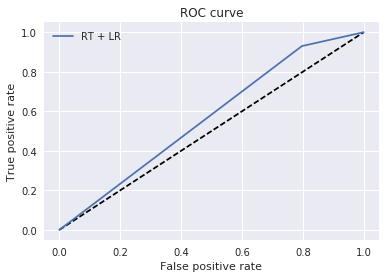

*********************************


0.56644028168465388

In [111]:
y_pred = [1 if y > 0.5 else 0 for y in yprob]
complete_report(y_test, y_pred)

In [133]:
df_test_group_2.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'sample_id', u'genre_id', u'media_id', u'context_type', u'platform_family', u'media_duration', u'user_id', u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M', u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY', u'release_date_MONTH', u'release_date_YEAR', u'user_age_group', u'diff_user_song_age',
       u'media_decade', u'media_bpm', u'media_rank', u'artist_albuns', u'artist_fans', u'artist_radio', u'user_id_id', u'platform_name_1', u'platform_name_2', u'user_age_19', u'user_age_20',
       u'user_age_21', u'user_age_22', u'user_age_23', u'user_age_24', u'user_age_25', u'user_age_26', u'user_age_27', u'user_age_28', u'user_age_29', u'user_age_30', u'user_gender_1',
       u'ts_listen_DAY_OF_WEEK_1', u'ts_listen_DAY_OF_WEEK_2', u'ts_listen_DAY_OF_WEEK_3', u'ts_listen_DAY_OF_WEEK_4', u'ts_listen_DAY_OF_WEEK_5', u'ts_listen_DAY_OF_WEEK_6',
       u'ts_listen_PERIOD_OF_DAY_1', u'ts_listen_PERIOD_OF_DAY_2', u'ts_l

In [132]:
df_test_group_2 = df_test[df_test["user_id_id"].isin(user_for_general_model)].copy(deep=True)
# xg_sub = xgb.DMatrix(df_test_group_2[features], missing=np.NaN)
# p = bst.predict(xg_sub)

#df_test_group_2["listen_type_1"]= 1
p = model.predict_proba(df_test_group_2[features])
p = p[:, 1]
df_test_group_2["prediction"] = p

df_test_group_2["prediction"] = p
df_test_group_2["prediction"].head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
df_test_group_2[["user_id_id", "prediction"]].to_csv("group2.csv")

In [144]:
df_test_group_1 = pd.read_csv("group1.csv", index_col="user_id_id")
df_test_group_2 = pd.read_csv("group2.csv", index_col="user_id_id")

In [145]:
df_test = pd.read_csv("../data/test_data4.csv")
#df_test = df_test["user_id"]
#df_test["user_id_id"] = df_test["user_id"]
# df_test = pd.merge(df_test, df_test_group_1[["user_id", "prediction"]], on="user_id")
# df_test = pd.merge(df_test, df_test_group_2[["user_id", "prediction"]], on="user_id")
df_test = pd.merge(df_test, df_test_group_1[["prediction"]], left_on="user_id", right_index=True, how="outer")
#df_test.join(df_test_group_2[["prediction"]])
df_test = pd.merge(df_test, df_test_group_2[["prediction"]], left_on="user_id", right_index=True, how="outer")

In [146]:
print(len(df_test_group_1))
print(len(df_test_group_2))
print(len(df_test))

19160
662
19918


In [147]:
#pd.set_option("precision", 10)
#df_test_group_2[["user_id", "prediction"]].head()
a = pd.read_csv("../data/test_data4.csv")

In [148]:
a["user_id"].head()

0    17698
1    10525
2     8716
3     5443
4     7600
Name: user_id, dtype: int64

In [149]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,...,user_age_group,diff_user_song_age,media_decade,media_bpm,media_rank,artist_albuns,artist_fans,artist_radio,prediction_x,prediction_y
0,0,0,0,50,2016-11-02 14:32:51,683078,82356,1,2002-10-08 00:00:00,0,...,2,15.920548,7,181.0,293191.0,25.0,31649.0,1.0,1.0,NaN
1,1,1,1,2744,2016-11-16 15:25:40,876497,99692,1,1985-12-31 00:00:00,0,...,2,-2.898630,5,88.0,743839.0,10.0,585650.0,1.0,0.8,NaN
2,2,2,2,2744,2016-11-19 07:06:01,876497,99692,1,1985-12-31 00:00:00,0,...,2,-3.906849,5,88.0,743839.0,10.0,585650.0,1.0,0.3,NaN
3,3,3,3,2744,2016-11-06 16:42:09,876500,99692,1,1985-12-31 00:00:00,2,...,2,-0.871233,5,107.0,630042.0,10.0,585650.0,1.0,0.7,NaN
4,4,4,4,2744,2016-11-29 17:42:40,876504,99692,1,1985-12-31 00:00:00,2,...,2,-1.934247,5,110.0,372256.0,10.0,585650.0,1.0,0.9,NaN


In [150]:
df_test["prediction_x"].fillna(0, inplace=True)
df_test["prediction_y"].fillna(0, inplace=True)
df_test["prediction"] = df_test["prediction_x"] + df_test["prediction_y"]

In [151]:
df_test["prediction"].head()

0    1.0
1    0.8
2    0.3
3    0.7
4    0.9
Name: prediction, dtype: float64

In [152]:
df_test.ix[8716]["prediction"]

0.59999999999999998

In [153]:
df_test["prediction"].values[:5]

array([ 1. ,  0.8,  0.3,  0.7,  0.9])

In [154]:
len(df_test)

19918

In [155]:
(df_test["prediction"] > 1.0).sum()

0

In [156]:
(df_test["prediction"] == 1.0).sum()

1111

In [157]:
(df_test["prediction"] == 0).sum()

380

In [158]:
pd.isnull(df_test["prediction_y"]).sum()

0

In [159]:
#df_test["prediction"] = df_test["prediction"].apply(lambda x : 1 if x > 1 else x)

In [160]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [161]:
#p = model.predict_proba(df_test[features])
#p = p[:, 1]
p = df_test["prediction"].values

df_test[["user_id", "sample_id", "prediction"]].to_csv("note20.csv")

In [162]:
build_kaggle_submission(p, "note21_2")

In [163]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1519.322321
9.560672
6.4e-05


In [ ]:
!ls

In [124]:
df_test[["user_id_id", "sample_id", "prediction"]]

KeyError: "['prediction'] not in index"